In [1]:
# import pip

# def install(package):
#     if hasattr(pip, 'main'):
#         pip.main(['install', package])
#     else:
#         pip._internal.main(['install', package])
        
# install("networkx")

(1, 3, 4, 5, 6, 8, 11)
1-3: 3
1-4: 4
1-5: 5
1-6: 6
1-8: 8
1-11: 11
3-4: 12
3-5: 2
4-5: 7
6-8: 9
6-11: 1
8-11: 10


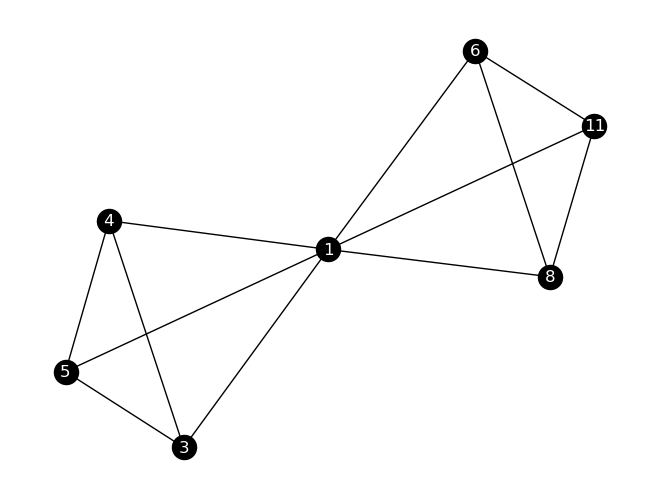

In [31]:
import networkx as nx
import itertools as it

def _get_mapping(graph, labeling_list):
    labeling_iterator = iter(labeling_list)
    mapping = dict()
    [mapping.update({vertex:next(labeling_iterator)}) for vertex in graph.nodes()]
    return mapping

def _is_valid_labeling(graph, mod):
    edge_labels = set()
    [edge_labels.add((u*v)%mod) for u,v in graph.edges()]
    if len(edge_labels)==graph.number_of_edges():
        return True
    else:
        return False
    
def _find_labeling(graph,labeling_list):
    output = []
    for combination in it.combinations(labeling_set, graph.number_of_nodes()):
        test_graph = nx.relabel_nodes(graph, _get_mapping(graph, combination))
        if _is_valid_labeling(test_graph, (max(labeling_list)+1)):
            output = combination
            break
    return output

def _draw_labeling(graph,labeling):
    nx.draw(nx.relabel_nodes(graph, _get_mapping(graph, labeling)), with_labels=True, font_color="white", node_color="black")

def _print_edges(graph,labeling_set):
    [print(f"{u}-{v}: {(int(u)*int(v))%(max(labeling_set)+1)}") for u,v in graph.edges()]
    
u21 = [1, 2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20]
u13 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

k4_snake = nx.parse_adjlist(["1 2 3 4 5 6 7", "2 3 4", "3 4", "5 6 7", "6 7"])

test_graph = k4_snake
labeling_set = u13

labeling = _find_labeling(test_graph,labeling_set)

print(labeling)

test_graph = nx.relabel_nodes(test_graph, _get_mapping(test_graph, labeling))

_print_edges(test_graph,labeling_set)

_draw_labeling(test_graph,labeling)